In [1]:
import time
import imutils
import cv2
import matplotlib.pyplot as plt
import glob
import os

In [2]:
model_path = "starry_night.t7"
model = cv2.dnn.readNetFromTorch(model_path)

In [3]:
image = cv2.imread("zao.jpeg")

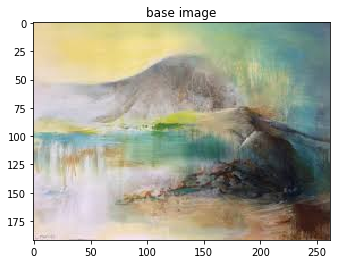

In [4]:
rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.title("base image")
plt.imshow(rgb)

In [5]:
image = imutils.resize(image, width=600)
(height, width) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image,1.0,(width,height),
                             (102.234, 116.2,123.988),swapRB=False, crop=False)

In [6]:
model.setInput(blob)

In [7]:
new_img = model.forward()
new_img = new_img.reshape((3, new_img.shape[2], new_img.shape[3]))

In [8]:
new_img[0] += 103.939
new_img[1] += 116.779
new_img[2] += 123.680
new_img /= 255
new_img = new_img.transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


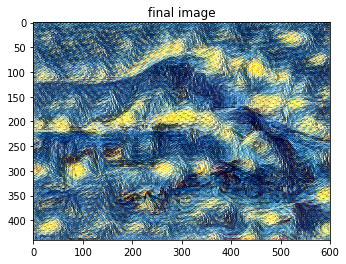

In [9]:
plt.title("final image")
plt.imshow(new_img[:,:,::-1])